In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\wine.csv")
df.head(3)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
X = df.iloc[:,1:]

In [8]:
X.shape

(178, 13)

In [9]:
y = df.iloc[:,0]

In [10]:
y.shape

(178,)

In [11]:
y.unique()

array([1, 2, 3])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

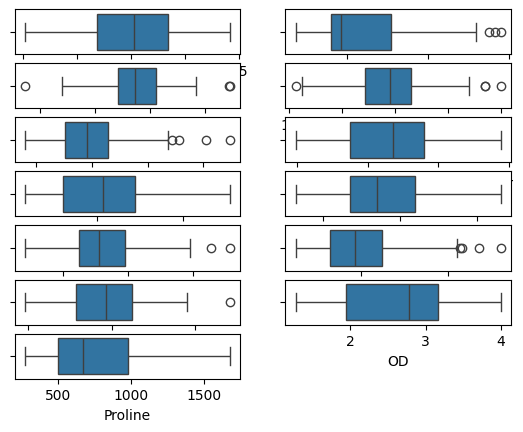

In [13]:
p = 1
for col in X.columns:
    plt.subplot(7,2,p)
    sns.boxplot(x = X[col])
    p = p+1
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtc = DecisionTreeClassifier(random_state=42)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train ,X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [19]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = dtc.predict(X_test)

In [22]:
dtc.score(X_test,y_test)*100

94.44444444444444

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_pred,y_test)

In [25]:
cm

array([[13,  0,  1],
       [ 1, 14,  0],
       [ 0,  0,  7]])

In [27]:
(cm[0][0]+cm[1][1]+cm[2][2])/sum(sum(cm))*100

np.float64(94.44444444444444)